<a href="https://colab.research.google.com/github/ME-UoP-ME421-Oct-2023/E-18-230/blob/main/E_18_230_ME421_Vibration_Activity_Oct_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TecQuipment - Vibration Analyser

Consider the TecQuipment vibration analyser setup where one end of a rigid beam is pinned and the other end is connected to the frame through a spring while an unbalnced motor is attached to the middle section of the beam.

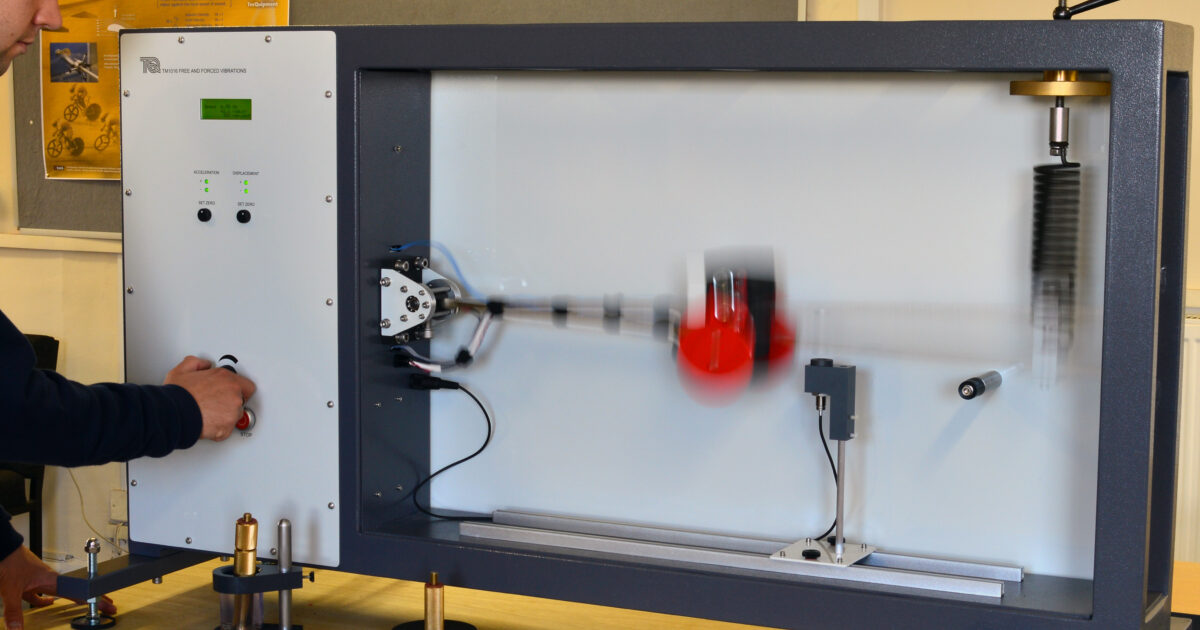

https://youtu.be/r_ouYEYhR5U

#Resources

https://github.com/mugalan/vibration-analysis

#Week #1

##Activity #1

Derive the 1-dof freedom model for describing the small amplitude motion of the system.

Considering the momnet of inertia of the complete system,

$ I_{sy} = I_{b} + I_{mo} +I_{s}      -(1)$

where,

 sy=system, b=beam, m= motor, s=spring, e=end mass

$\\ I_{b} = m_{b}l_{b}^2/12 + m_bl_b^2/4 = m_{b}l_{b}^2/3
\\I_{s}=(m_s/3 + m_e)I_s^2
\\I_m=m_ml_m^2 $

from (1)

$\\I_{sy}=m_{b}l_{b}^2/3+m_ml_m^2+(m_s/3 + m_e)I_s^2 -(2)$       

Considering the momnet around fixed position,

$\\I_{sy} \ddot{θ} + kx_sI_s =0 -(3)$

where $θ$ is the angle of osilation of beam around the fixed end and $x_s$ is the deflection of spring.

$ x_s = θ l_s-(4) $

from (1),(2),(3),(4),

 $ [ m_{b}l_{b}^2/3+m_ml_m^2+(m_s/3 + m_e)I_s^2 ] \ddot{θ} + kl_s^2θ = 0 $

 this is second order differentiial equation, solution of this is,

 $ θ = A \; cos(\sqrt(kl_s^2/ I_A )t- α) $

 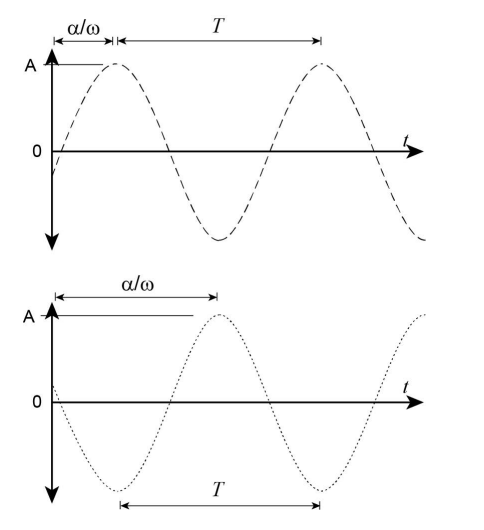

 From the graph,

 $ T = 2 \pi \sqrt(I_A/(K;_s^2)) $

From this equation for T,

we can get a equation for $ω$

Inserting this to the differential equation,
$ \ddot(θ) + ω2 θ = 0$

**Viscous Damping**

When daper is added to the system, above mentioned equation changed as follows.

$ I_{sy}\ddot{θ}+kx_sl_s+cl_c= 0  $

where c is the damping

$ \ddot{θ}+cl_d^2 θ/I_{sy} + kl_s^2 \theta /I_{sy}  =  0
\\ \ddot{θ} + 2γ \dot{θ} + ω^2 θ =0  - (5)$

where $ γ $ is the decay coefficient

Assuming the standard solution is in the $ θ = Ce^(rt) $ form.

From substituting this to the equation,

$ r^2 + 2γr + ω^2 =0 $

From solving this,

$ r = - γ ± \sqrt(γ^2-ω^2) $

Three cases occur accoring to the relationship between $r$ and $ω$,

1) Underdamped - where $γ$ < $ω$ gives two complex roots

2) Critically damped - where $γ$ = $ω$ gives single root

3) Overdamped - where $γ$ > $ω$ gives two real roots

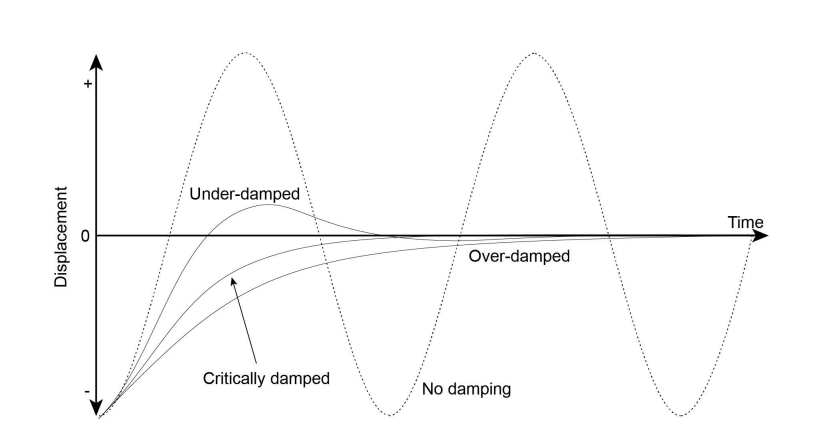

** Forced Vibrations**

When a oscillating force (Q) is provided by the exciter equation changes as follows,

$ I_A\ddot(θ)+cl_{damper}2 \dot(θ)+kl_{spring}^2θ = I_{mass}Q \:sin(Ωt) $

$Q=Ω^2m_{offsetness} r_{offsetness} $

$ \ddot{θ} + 2γ \dot{θ} + ω^2 θ = q \;sin(Ωt) $

solution to this equation is,

$θ = M \;cos(Ωt)+N\;sin(Ωt)$





##Activity #2

Estimate the damped natural frequency, $\omega_d$, and the amplitude of reseonance, $x_{ss_{max}}$, for small amplitude vibrations.

When damper is added to the system, above mentioned equation changed as follows.

$ I_{sy}\ddot{θ}+kx_sl_s+cl_c= 0  $

where c is the damping

$ \ddot{θ}+cl_d^2 θ/I_{sy} + kl_s^2 \theta /I_{sy}  =  0
\\ \ddot{θ} + 2γ \dot{θ} + ω^2 θ =0  - (5)$

where $ γ $ is the decay coefficient


$ q = l_{exciter}m_{offsetmass}r_{offsetness}Ω^2/I_A
\\ Let's take
\\α = l_{exciter}m_{offsetmass}r_{offsetness}/I_A $



##Activity #3

Plot the following:

* the unforced repsonse to an initiail diplacement of the spring end of the beam
* the forced response for three choices of the rotational speed of the motor
* theoretical frequency response of the system

$ \ddot{θ} + 2γ\dot{\theta} + \omega ^2θ = 0 $

By sustituting $ γ= \zeta ω $

 $ \ddot{θ} + 2\zeta ω\dot{\theta} + \omega ^2θ = 0 $

In [ ]:
import sympy as sp

# Defining symbols
t = sp.symbols('t')   #time
W = sp.symbols('omega')  #natural freq
C = sp.symbols('zeta')  # damping ratio
theta = sp.Function('theta')('t')

# Defining equation
eq = sp.Eq(theta.diff(t, t) + 2 * C * W * theta.diff(t) + W**2 * theta, 0)

sol = sp.dsolve(eq,theta)

sol_initial = sol.subs({theta.subs(t, 0): 1, theta.diff(t).subs(t, 0): 0}
)
sol_initial




Eq(theta(t), C1*exp(omega*t*(-zeta + sqrt(zeta**2 - 1))) + C2*exp(-omega*t*(zeta + sqrt(zeta**2 - 1))))

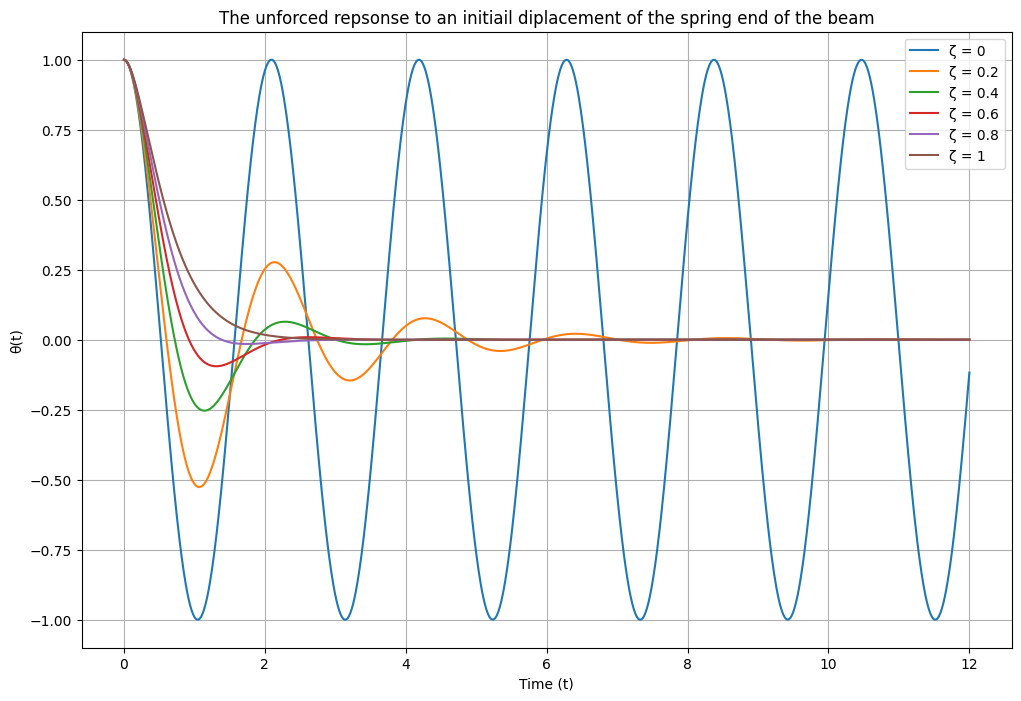

In [ ]:
#Importing libraries
import numpy as np
from math import sqrt
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Defining the model
def model(t, v, C, W):
    theta, theta_dot = v
    dtheta_dt = theta_dot
    dtheta_dot_dt = -2 * C * W * theta_dot - W**2 * theta
    return [dtheta_dt, dtheta_dot_dt]

#initial conditions
W = 3
C_values = [0,0.2,0.4,0.6,0.8,1]

plt.figure(figsize=(12, 8))

for C in C_values:
    initial_conditions = [1.0, 0.0]
    t_span = (0, 12)
    # Solve using solve_ivp
    sol = solve_ivp(model, t_span, initial_conditions, args=(C, W), t_eval=np.linspace(0, 12, 1200))
    plt.plot(sol.t, sol.y[0], label=f'ζ = {C}')

plt.xlabel('Time (t)')
plt.ylabel('θ(t)')
plt.title('The unforced repsonse to an initiail diplacement of the spring end of the beam')
plt.legend()
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'The forced response for three choices of the rotational speed of the motor')

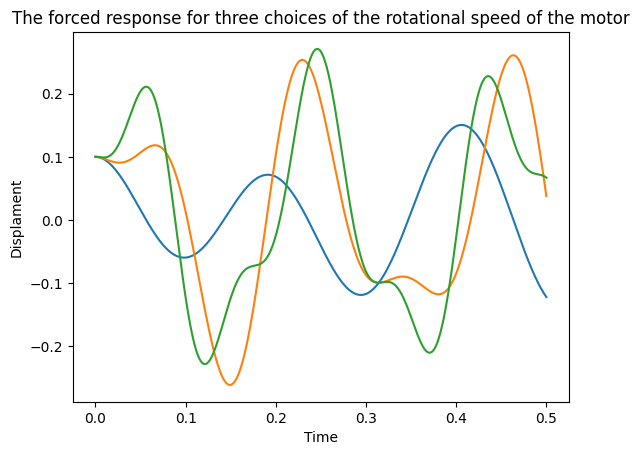

In [ ]:
#Importing libraries
import numpy as np
from math import sqrt
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#data
I_sy =1 # I of total system
c = 0.1 #damping ratio
l_e = 0.4 #l_exciter

k = 150 #k value
t = np.linspace(0,0.5,1000)
m_o = 0.5 #m_off set mass
r_o = 0.3 #r_offsetmass

#calculating decay coeddicient
d_co = c*l_d /(2*I_sy)
#calculating omega
#omega = sqrt(k*l_s*l_s/I_sy)
omega = 30


def model(v,t):
  ang_dis,ang_vel=v
  ang_acc = (-2*d_co*ang_vel-omega*omega*ang_dis) + q * np.sin(motor_speed*t)
  return [ang_vel,ang_acc]

#initial conditions of model
initial_ang_dis = 0.1 #initial angular displacement
initial_ang_vel = 0 # inital angular velocity
initial_angle = 0

motor_speeds = [20,50,70]

#calculation solutions
#freq = frequency(motor_speed,t)
#freq = frequency(motor_speeds,t)
plt.figure()

for motor_speed in motor_speeds:
  Q =  motor_speed*motor_speed*(m_o*r_o)
  q = l_e*Q/I_sy
  sol = odeint(model,[initial_ang_dis,initial_ang_vel],t)
  displacement= sol[:,0]
  plt.plot(t,displacement)

plt.xlabel("Time")
plt.ylabel("Displament")
plt.title("The forced response for three choices of the rotational speed of the motor")

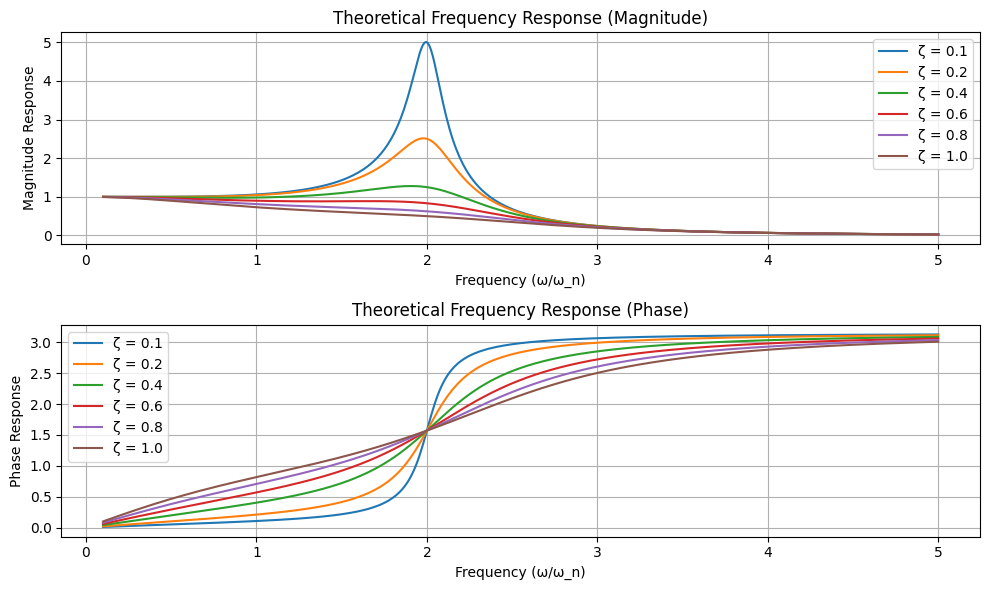

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
W_n = 2.0  # Natural frequency
C_values = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
f_range = np.linspace(0.1, 5.0, 500)

# Create a figure to hold all the plots
plt.figure(figsize=(10, 6))

for C in C_values:
    # Calculate the theoretical frequency response for each damping ratio
    magnitude_response = []
    phase_response = []

    for W in f_range:
        Mag = 1 / np.sqrt((1 - (W**2 / W_n**2)**2)**2 + (2 * C * W / W_n)**2)
        phase = np.arctan2(2 * C * W / W_n, 1 - (W**2 / W_n**2)**2)
        magnitude_response.append(Mag)
        phase_response.append(phase)

    # Plot the magnitude response for each damping ratio
    plt.subplot(2, 1, 1)
    plt.plot(f_range, magnitude_response, label=f'ζ = {C}')

    # Plot the phase response for each damping ratio
    plt.subplot(2, 1, 2)
    plt.plot(f_range, phase_response, label=f'ζ = {C}')

# Add labels, legends, and grid
plt.subplot(2, 1, 1)
plt.xlabel('Frequency (ω/ω_n)')
plt.ylabel('Magnitude Response')
plt.title('Theoretical Frequency Response (Magnitude)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.xlabel('Frequency (ω/ω_n)')
plt.ylabel('Phase Response')
plt.title('Theoretical Frequency Response (Phase)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


#Week #2

##Activity #4





Plot the experimental frequency response of the system and find $\omega_d$ and $x_{ss_{max}}$ and compare it with your theoretical estimates and discuss the reasons for discrepancies if any.

FRom the obtained data from the experiment,

\begin{array}
Speed\,Ratio&Max \,Amplitude\\
0.874&0.3928\\
0.914&0.5056\\
0.954&0.806\\
0.986&2.4927\\
0.994&16.9153\\
0.997&14.1259\\
1.010&2.993\\
1.020&2.131\\
1.025&1.8641
\end{array}

Graph,
By using experimental values, we can get below data,

\begin{array}{ccc}
Speed\,Ratio&Max \,Amplitude\\
0.874&0.3928\\
0.914&0.5056\\
0.954&0.806\\
0.986&2.4927\\
0.994&16.9153\\
0.997&14.1259\\
1.010&2.993\\
1.020&2.131\\
1.025&1.8641
\end{array}

From the above data Speed ratio Vs Amplitude graph was drawn and got the **Experimental Max Amplitude and $\omega_d$**.

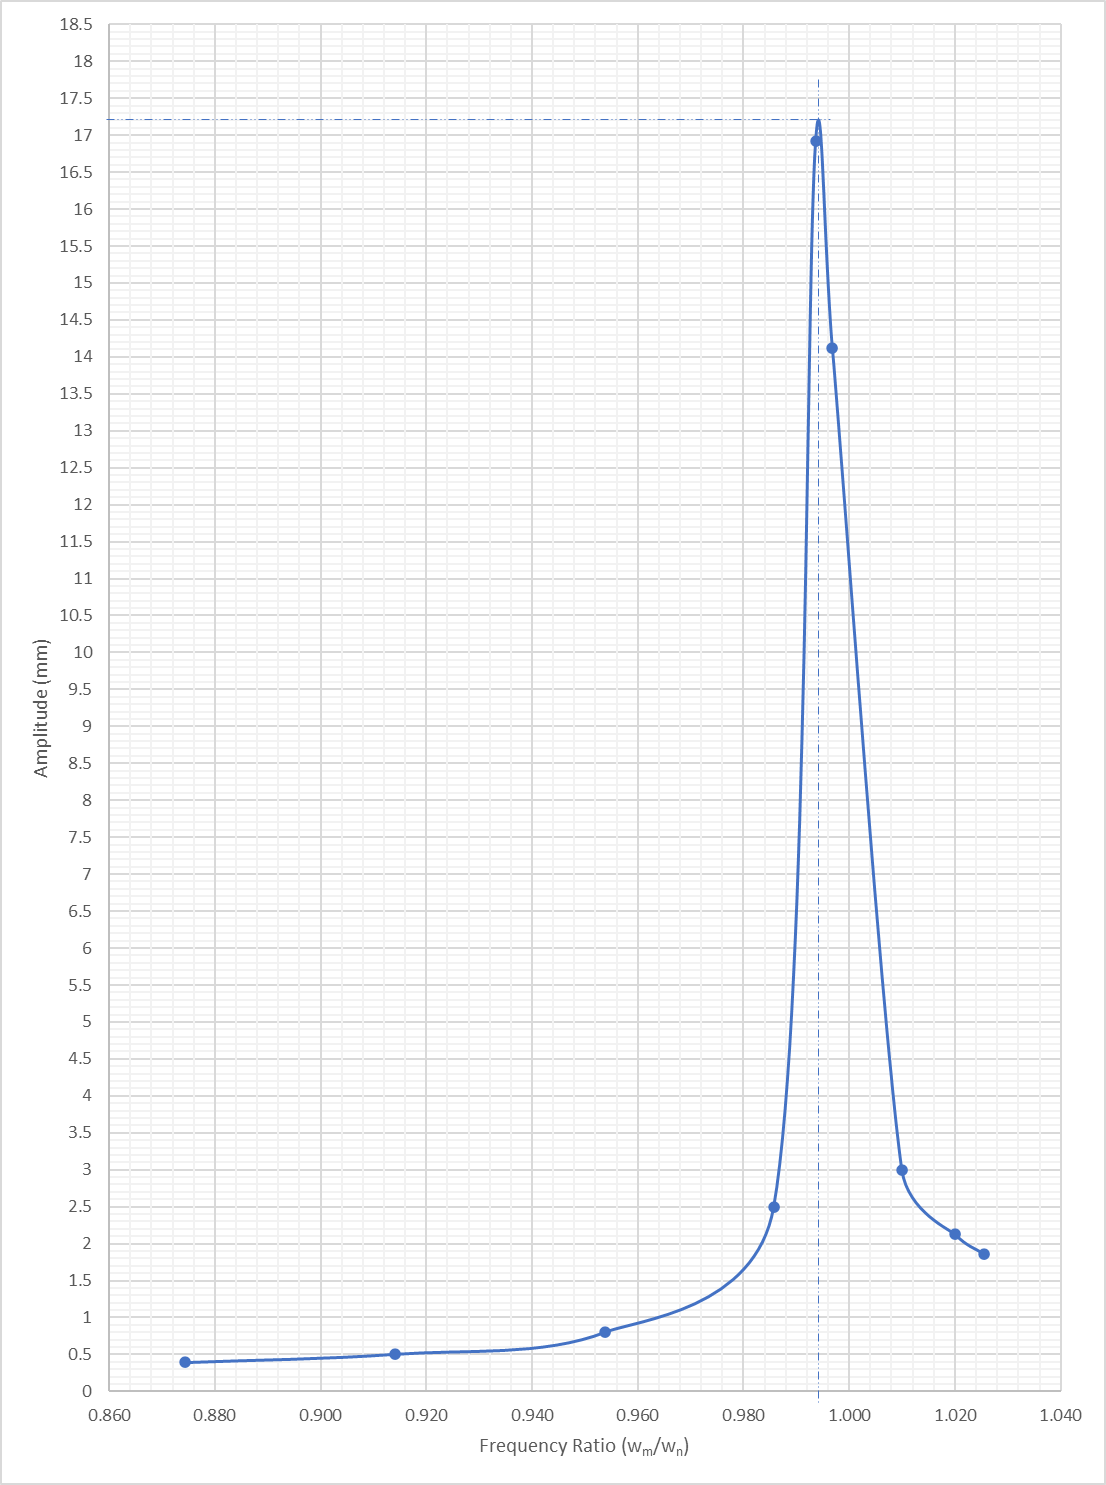

\begin{array}{ccc}
Max. \, Amplitude&=\, 13.52 \,mm\\
\omega_d/\omega_n&= \, 0.994\\
\omega_d&= \, 6.25226\, rad/s \\
\end{array}

For the **Theoretical values**,

\begin{array}{ccc}
ζ &=decay\,ratio/\omega_n&=0.013\\
\omega_d&= \,6.291\, rad/s \\
\end{array}


From the Graph. \\
Max Amplitude =13.52mm \\
$ ω_d/ ω_n = 0.994 $ \\
$ \omega_d = 6.25226 $







#Week #3

##Activity #5

Design a tuned mass vibration absorber for the system and justify your design using simulations.

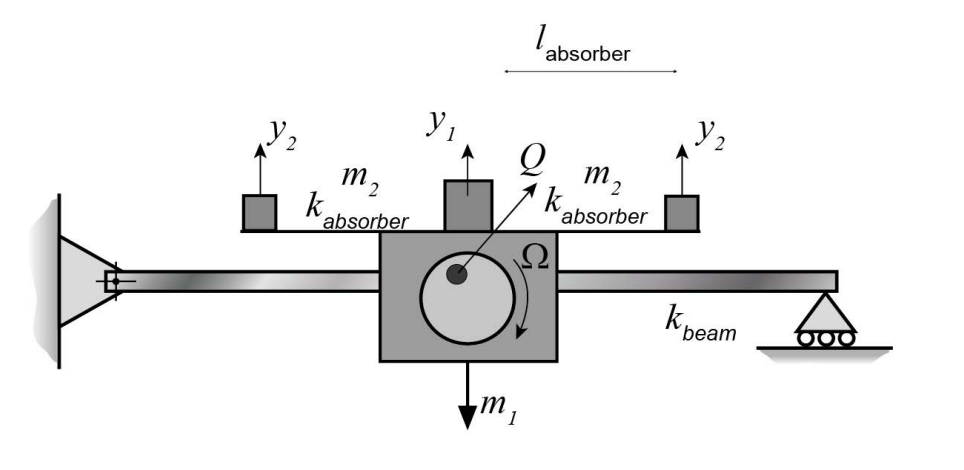

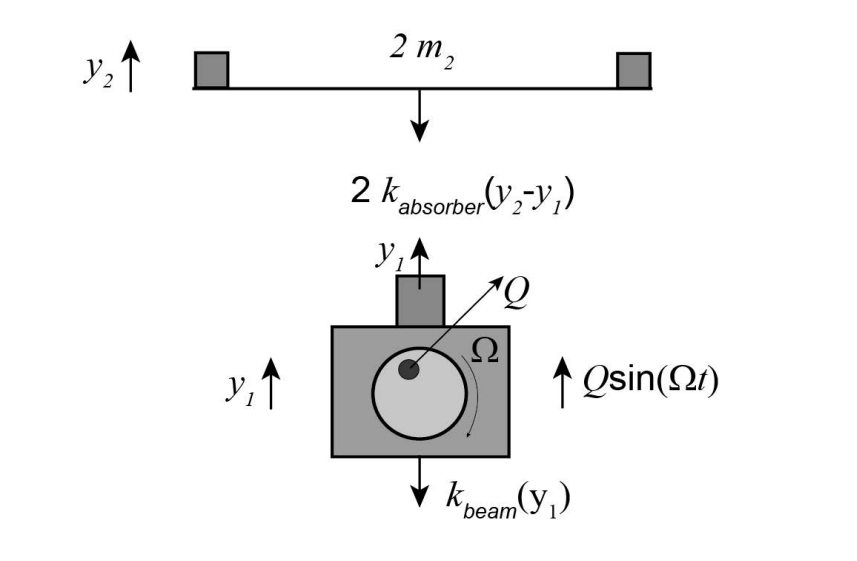

$ m_1 \, \ddot y_1 + (k_{beam}+2k_{absorber})y_1 - 2k_{absorber} y_2 = Q \, sin(Ωt) - (1)$

$ 2m_2\ddot{y_2} -2k_{absorber}y_1+2k_{absorber}y_2 = 0 $

Using following as solutions,

$ y_1 = A \;sin(ωt) , \ddot{y_1} = A\omega^2\;sin(ωt) $ \\
$ y_2 = B \;sin(ωt) , \ddot{y_1} = B\omega^2\;sin(ωt) $ \\
Where A and B are oscillaation amplitudes,\\
Substituting these to the (1),\\
We can get a equation in the form of $ CY = F $ where, \\
\begin{equation} C = \begin{bmatrix}k_{beam}+2k_{absorber}-m_1ω^2 & - 2k_{absorber} \\ -2k_{absorber} & 2k_{absorber}-2m_2ω^2 \end{bmatrix} \end{equation} \\

\begin{equation} Y =  \begin{bmatrix} A\;sin(ωt) \\ B\;sin(ωt) \end{bmatrix} \end{equation}
and

\begin{equation} F =  \begin{bmatrix} Q\;sin(ωt) \\ 0 \end{bmatrix} \end{equation}

Natural frequencies are determined with external forces set to zero.

\begin{equation} C = \begin{bmatrix}k_{beam}+2k_{absorber}-m_1ω^2 & - 2k_{absorber} \\ -2k_{absorber} & 2k_{absorber}-2m_2ω^2 \end{bmatrix} = 0 \end{equation} \\

$ 2m_1m_2ω^4 -[2m_1k_{absorber} +2m_2CK_{beam} +2k_{absorber}] ω^2 +2k_{beam}k_{absorber} = 0 $ \\
$ ω^2 = -b ± \sqrt{b^2 - 4ac}/2m_1m_2 $ \\
$ b-(2m_1k_{absorber} +2m_2(k_{beam}+2k_{absorber})) $ \\
$ c = 2k_{beam}k_{absorber} $ \\
$ CY = F $ \\
$ Y =C^{-1}F = adj(C)F/det(C) $ \\

\begin{equation} \begin{bmatrix} A\;sin(ωt) & B\;sin(ωt) \end{bmatrix} = \begin{bmatrix} 2k_2-2m_2ω^2 & 2k_2 \\ 2k_2 & k_1+2k_2-m_1ω^2 \end{bmatrix} \begin{bmatrix} Q\;sin(Ωt) \\ 0  \end{bmatrix} \ Δ \end{equation}

$ A = [(2k_2-2m_2ω^2)Q +2k_2(0)]  /Δ $ \\
$ B = [(2k_2Q + (k_1+2k_2-m_1ω^2)0)]  /Δ $

$ 0 = (2k_2-2m_2ω^2)Q /Δ $ \\
$ 2k_2 = 2m_2ω^2 $ and $ ω = \sqrt(k_2/m_2) $ \\
calculate the expected amplitude of the vibration absorber (B),\\
$ B = 2K_2Q / Δ $ \\
$(2k_2 = 2m_2 ω^2)( k_1+ 2k_2 -m_1 ω^2) - 4k_2^2 $ and $ ω^2 = k_2/m_2 $
$ B = -Q/2k_2 $
$ k_2 = 3EI_{absorber}/l_{absorber}^3 $ \\
$ l_{absorber} = (\frac{3EI_{absorber}/m_2}{(2πf)^2 })^1/3 $

#Week #4

##Activity #6

Experimentally verify your tuned mass vibration absorber design.

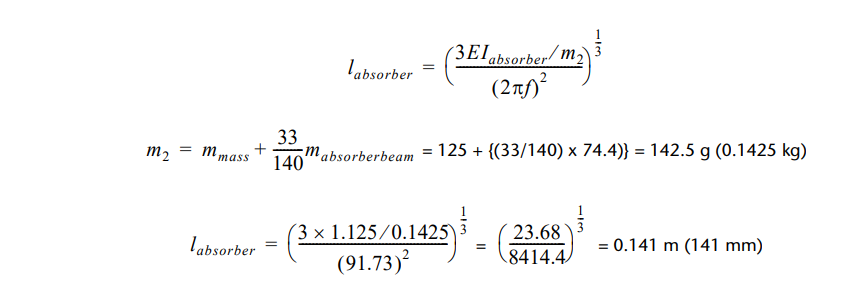

Adjust the absorrber length according to the calculation and did the practical again and the following results were obtained.
\begin{equation}
l_{absorber}= \left(\frac{3 E I_{absorber}/m_2}{(2 π f)^2} \right)^{\frac{1}{3}}
\end{equation}

$m_2 = m_{mass} + \frac {33}{140} m_{absorberbeam} = 0.121 + {\frac {33}{140} \times 0.126} = 0.1507 \; kg$

For, simply supported beam;

\begin{equation}
ω=\sqrt {\frac {k_{beam}}{m_{eff}}}
\end{equation}

$m_{eff} = m_{exiter}+\frac {17}{35} m_{beam} + m_{absorber}$
$m_{eff} = 4.2+\frac {17}{35} \times 1.65 + 0.430 = 5.431 \;kg$

\begin{equation}
ω=\sqrt {\frac {4.74 \times 10^4}{5.431}} = 93.42 \;rad/s \\
f = \frac{ω}{2\pi} = \frac{93.42}{2\pi} = 14.87 \; Hz
\end{equation}

\begin{equation}
l_{absorber}= \left(\frac{3\times 2 \times 10^{11} \times 7.2179 \times 10^{-12}}{(93.42)^2 \times 0.1507} \right)^{\frac{1}{3}} \\
l_{absorber}= 0.1447 = 144.7 \;mm
\end{equation}

Adjust the absorber length and did the practical.

Here is the data got from the experiment,

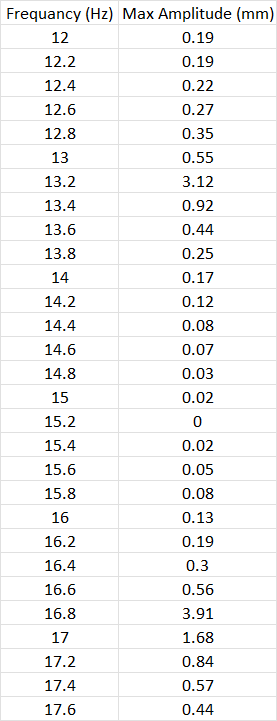

From the data, graph was plotted,

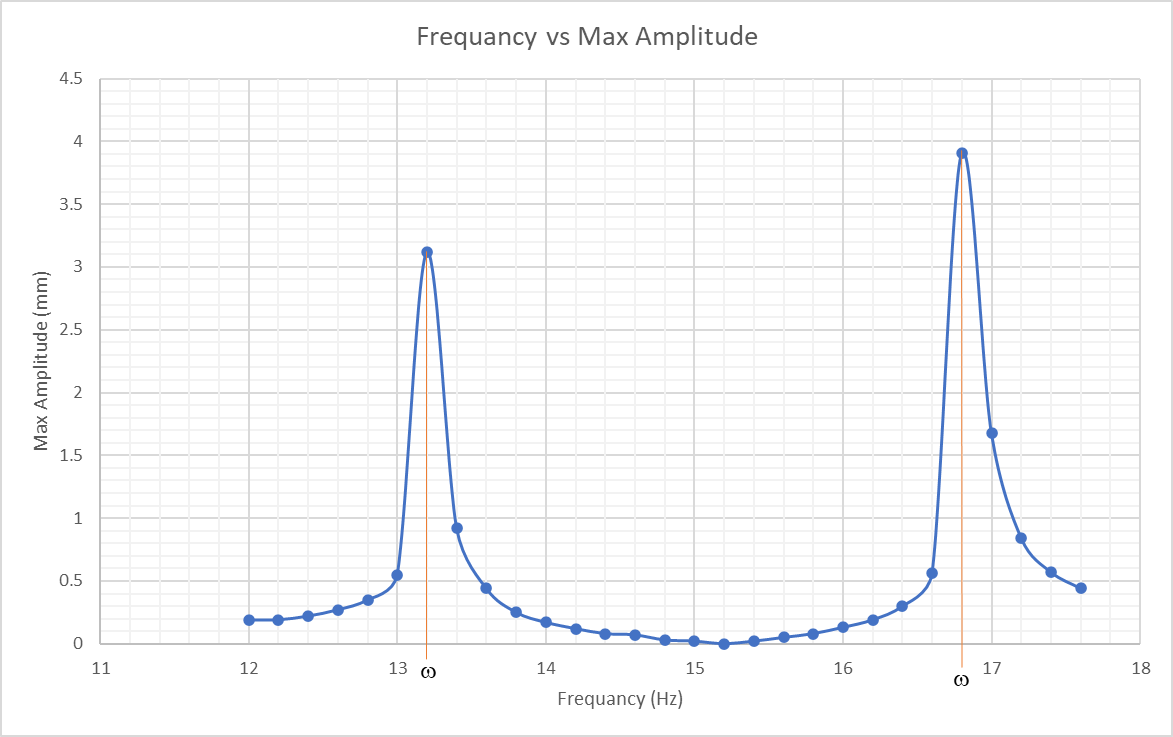

Then draw the graph.
\begin{equation}
l_{absorber}= \left(\frac{3 E I_{absorber}/m_2}{(2 π f)^2} \right)^{\frac{1}{3}}
\end{equation}

$m_2 = m_{mass} + \frac {33}{140} m_{absorberbeam} = 0.121 + {\frac {33}{140} \times 0.126} = 0.1507 \; kg$

For, simply supported beam;

\begin{equation}
ω=\sqrt {\frac {k_{beam}}{m_{eff}}}
\end{equation}

$m_{eff} = m_{exiter}+\frac {17}{35} m_{beam} + m_{absorber}$
$m_{eff} = 4.2+\frac {17}{35} \times 1.65 + 0.430 = 5.431 \;kg$

\begin{equation}
ω=\sqrt {\frac {4.74 \times 10^4}{5.431}} = 93.42 \;rad/s \\
f = \frac{ω}{2\pi} = \frac{93.42}{2\pi} = 14.87 \; Hz
\end{equation}

\begin{equation}
l_{absorber}= \left(\frac{3\times 2 \times 10^{11} \times 7.2179 \times 10^{-12}}{(93.42)^2 \times 0.1507} \right)^{\frac{1}{3}} \\
l_{absorber}= 0.1447 = 144.7 \;mm
\end{equation}

Adjust the absorber length and did the practical.

Here is the data got from the experiment,

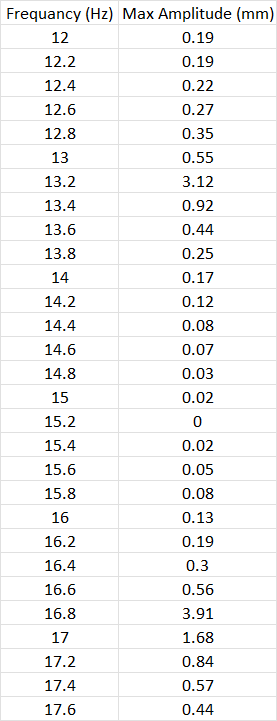

From the data, graph was plotted,

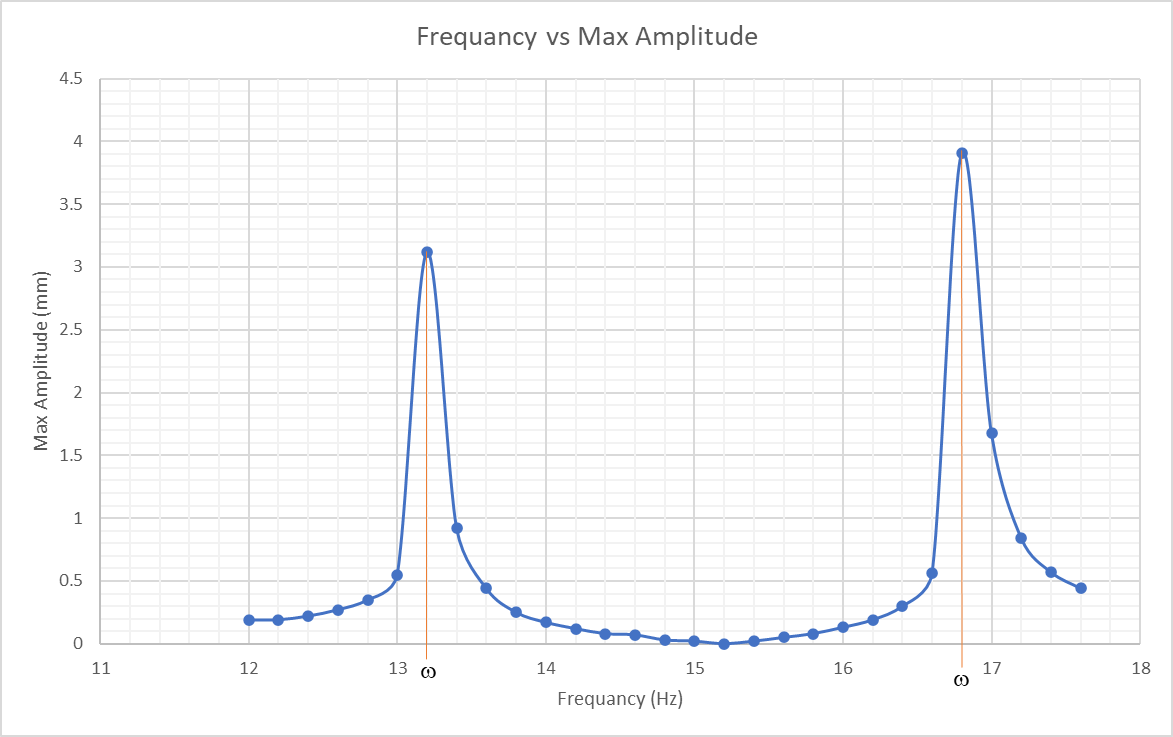

To calculate the higher and the lower system frequancy,

\begin{equation}
ω^2 =\frac{-b \pm \sqrt{b^2-4ac}}{2a}
\end{equation}

Where:

$m_1 = m_{exciter} + \frac{17}{35} m_{beam} +m_{absorber}$\\
m_1 = 4.2 + \frac{17}{35} \times 1.5 + 0.438 = 5.368\; kg $\\
m_2 = 0.1507 \;kg$

$a= 2m_1 m_2 $\\
$a= 2 \times 5.368 \times 0.1507 = 1.62 $\\
$ b= - (2 m_1 k_{absorber} + 2m_2 (k_{beam} +2k_{absorber})) $\\
$ b= - (2 \times 5.368 \times 1.2\times 10^3 + 2 \times 0.1507 (4.74 \times 10^4 +2 \times 1.2 \times 10^3)) = -27892.92 $\\
$ c= 2 k_{beam} \, k_{absorber}$
$ c= 2 \times4.74 \times 10^4 \times 1.2\times 10^3 = 1.14\times 10^8 $


For the new higher system frequancy,

\begin{equation}
ω =\sqrt {\frac{-b + \sqrt{b^2-4ac}}{2a}} = 102.68 \; rad/s\\
f= 16.34 \;Hz
\end{equation}

For the new lower system frequancy,

\begin{equation}
ω =\sqrt {\frac{-b - \sqrt{b^2-4ac}}{2a}} = 81.70 \; rad/s\\
f= 13.0 \;Hz
\end{equation}